In [8]:
import cv2
import os
import random
import matplotlib.pyplot as plt
import numpy as np
import xml.etree.ElementTree as ET


In [9]:
def load_pascal_annotation(image_id):
    """Carrega anotações do arquivo Pascal VOC XML"""
    ann_path = os.path.join('..', 'data', 'openimages', 'traffic-light', 'pascal', f'{image_id}.xml')
    
    if not os.path.exists(ann_path):
        return None
    
    tree = ET.parse(ann_path)
    root = tree.getroot()
    
    boxes = []
    for obj in root.findall('object'):
        bbox = obj.find('bndbox')
        boxes.append({
            'class': obj.find('name').text,
            'xmin': float(bbox.find('xmin').text),
            'ymin': float(bbox.find('ymin').text),
            'xmax': float(bbox.find('xmax').text),
            'ymax': float(bbox.find('ymax').text)
        })
    return boxes

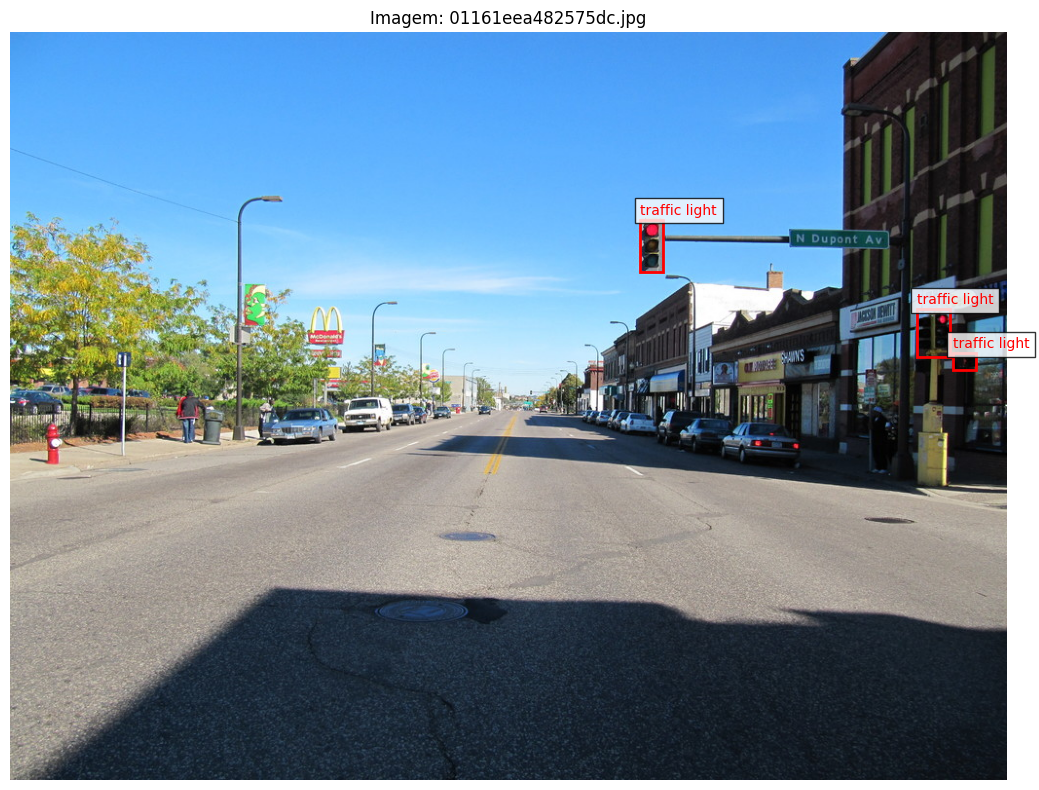

In [17]:
# open a random image from ../data/openimages/traffic-light
# and display image with annotation above it
image_path = os.path.join('..', 'data', 'openimages', 'traffic-light', 'images')
image_files = [f for f in os.listdir(image_path) if f.endswith('.jpg')]
image_file = random.choice(image_files)
image_id = image_file.split('.')[0] 

image = cv2.imread(os.path.join(image_path, image_file))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
annotations = load_pascal_annotation(image_id)

plt.figure(figsize=(12, 8))
plt.imshow(image)

# Desenha as bounding boxes e labels
if annotations:
    for box in annotations:
        # Cria retângulo
        rect = plt.Rectangle((box['xmin'], box['ymin']),
                           box['xmax'] - box['xmin'],
                           box['ymax'] - box['ymin'],
                           fill=False,
                           edgecolor='red',
                           linewidth=2)
        plt.gca().add_patch(rect)
        
        # Adiciona label
        plt.text(box['xmin'], box['ymin'] - 5,
                box['class'],
                color='red',
                fontsize=10,
                bbox=dict(facecolor='white', alpha=0.8))

plt.title(f'Imagem: {image_file}')
plt.axis('off')
plt.tight_layout()
plt.show()